In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
file = pd.read_csv("./CSV/datasets_494766_1209874_worldometer_data.csv")

In [3]:
file_df = pd.DataFrame(file)

In [4]:
file_df.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
0,USA,North America,330854064.0,1881205,NaN,108059.0,NaN,645974.0,NaN,1127172.0,17114.0,5686.0,327.0,18603174.0,56228.0
1,Brazil,South America,212442762.0,558237,1569.0,31309.0,31.0,253570.0,12943.0,273358.0,8318.0,2628.0,147.0,930013.0,4378.0
2,Russia,Europe,145929848.0,423741,NaN,5037.0,NaN,186985.0,NaN,231719.0,2300.0,2904.0,35.0,11151622.0,76418.0
3,Spain,Europe,46753443.0,287012,NaN,27127.0,NaN,NaN,NaN,NaN,617.0,6139.0,580.0,4063843.0,86921.0
4,UK,Europe,67858826.0,277985,NaN,39369.0,NaN,NaN,NaN,NaN,1559.0,4097.0,580.0,4615146.0,68011.0


In [5]:
covid = file_df[['Country/Region', 'Population', 'TotalCases', 'TotalDeaths', 'TotalTests']]

In [6]:
covid

,Country/Region,Population,TotalCases,TotalDeaths,TotalTests
0,USA,330854064.0,1881205,108059.0,18603174.0
1,Brazil,212442762.0,558237,31309.0,930013.0
2,Russia,145929848.0,423741,5037.0,11151622.0
3,Spain,46753443.0,287012,27127.0,4063843.0
4,UK,67858826.0,277985,39369.0,4615146.0
...,...,...,...,...,...
204,Seychelles,98300.0,11,NaN,NaN
205,MS Zaandam,NaN,9,2.0,NaN
206,Western Sahara,596066.0,9,1.0,NaN
207,British Virgin Islands,30216.0,8,1.0,167.0


In [7]:
covid["TotalCases"].describe().apply(lambda x: format(x, 'f'))

count        209.000000
mean       30477.133971
std       143952.912708
min            8.000000
25%          200.000000
50%         1339.000000
75%        10819.000000
max      1881205.000000
Name: TotalCases, dtype: object

In [8]:
total_cases = covid[['Country/Region', 'TotalCases']]

total_cases.head()

,Country/Region,TotalCases
0,USA,1881205
1,Brazil,558237
2,Russia,423741
3,Spain,287012
4,UK,277985


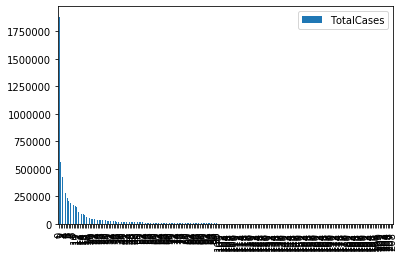

In [9]:
total_cases.plot(kind='bar')

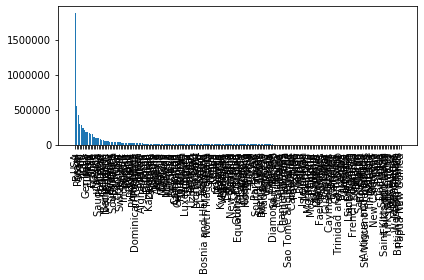

In [10]:
x = total_cases['Country/Region']
y = total_cases['TotalCases']

plt.bar(x,y)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [11]:
covid.to_csv('./CSV/covid.csv', index=False)

Connect to Database

In [12]:
file = pd.read_csv("./CSV/covid.csv")

In [13]:
file_df = pd.DataFrame(file)
file_df.head()

,Country/Region,Population,TotalCases,TotalDeaths,TotalTests
0,USA,330854064.0,1881205,108059.0,18603174.0
1,Brazil,212442762.0,558237,31309.0,930013.0
2,Russia,145929848.0,423741,5037.0,11151622.0
3,Spain,46753443.0,287012,27127.0,4063843.0
4,UK,67858826.0,277985,39369.0,4615146.0


In [14]:
rds_connection_string = "postgres:postgres@localhost:5432/COVID_df"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [15]:
engine.table_names()

['happiness_table',
 'countrycode_table',
 'covid_cases',
 'capital_table',
 'completed_table']

In [16]:
file_df.rename(columns={"Country/Region":"Country_Region"}, inplace=True)

In [17]:
file_df.head()

,Country_Region,Population,TotalCases,TotalDeaths,TotalTests
0,USA,330854064.0,1881205,108059.0,18603174.0
1,Brazil,212442762.0,558237,31309.0,930013.0
2,Russia,145929848.0,423741,5037.0,11151622.0
3,Spain,46753443.0,287012,27127.0,4063843.0
4,UK,67858826.0,277985,39369.0,4615146.0


In [18]:
file_df.columns=["country_region","population","totalcases","totaldeaths","totaltests"]
file_df.head()

,country_region,population,totalcases,totaldeaths,totaltests
0,USA,330854064.0,1881205,108059.0,18603174.0
1,Brazil,212442762.0,558237,31309.0,930013.0
2,Russia,145929848.0,423741,5037.0,11151622.0
3,Spain,46753443.0,287012,27127.0,4063843.0
4,UK,67858826.0,277985,39369.0,4615146.0


In [20]:
file_df.to_sql(name="covid_cases", con=engine, if_exists='append', index= False)

In [21]:
pd.read_sql_query('select * from covid_cases', con=engine).head()

,country_region,population,totalcases,totaldeaths,totaltests
0,USA,330854064.0,1881205.0,108059.0,18603174.0
1,Brazil,212442762.0,558237.0,31309.0,930013.0
2,Russia,145929848.0,423741.0,5037.0,11151622.0
3,Spain,46753443.0,287012.0,27127.0,4063843.0
4,UK,67858826.0,277985.0,39369.0,4615146.0
